In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/listings_cleaned.csv")
df = pd.read_csv("data/listings_cleaned.csv", parse_dates=["first_review", "last_review"])

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14851 entries, 0 to 14850
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           14851 non-null  int64         
 1   name                         14851 non-null  object        
 2   host_is_superhost            14851 non-null  bool          
 3   neighbourhood_cleansed       14851 non-null  object        
 4   latitude                     14851 non-null  float64       
 5   longitude                    14851 non-null  float64       
 6   property_type                14851 non-null  object        
 7   room_type                    14851 non-null  object        
 8   accommodates                 14851 non-null  int64         
 9   bathrooms                    14851 non-null  float64       
 10  bedrooms                     14851 non-null  float64       
 11  beds                         14851 non-nu

,id,name,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,33945,Spacious Cosy aprtm very close to Metro!,False,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.00673,23.72775,Entire condo,Entire home/apt,4,1.0,...,2025-06-18,4.75,4.76,4.71,4.88,4.90,4.64,4.81,False,0.47
1,49489,Ermou 44 - 3bdr apt in the heart of Athens,False,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97670,23.73064,Entire rental unit,Entire home/apt,7,1.5,...,2025-06-06,4.68,4.78,4.69,4.84,4.87,4.88,4.69,True,0.84
2,60394,Cosy apartment! Great central Athens location!,True,ΣΤΑΔΙΟ,37.96738,23.74038,Entire condo,Entire home/apt,2,1.0,...,2024-12-14,4.97,4.97,4.94,4.91,4.97,4.91,4.94,False,0.29
3,134340,Neo Pagrati Athens Apartment,False,ΠΑΓΚΡΑΤΙ,37.96405,23.74968,Entire condo,Entire home/apt,2,1.0,...,2025-06-06,4.67,4.66,4.40,4.97,4.93,4.55,4.83,False,0.36
4,154243,LUSCIOUS ROOF GARDEN IN THE CENTER!,False,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.98574,23.73323,Entire rental unit,Entire home/apt,4,1.0,...,2025-06-07,4.72,4.80,4.67,4.85,4.88,4.58,4.65,False,1.28


In [5]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

In [6]:
iqr = q3 - q1

In [7]:
iqr

62.0

In [8]:
low_bound = max(0,q1 - 1.5 * iqr)
up_bound = q3 + 1.5 * iqr

In [9]:
low_bound

0

In [10]:
up_bound

209.0

In [11]:
df_outliers = df[(df['price'] < low_bound) | (df['price'] > up_bound)]

In [12]:
len(df_outliers)

1343

In [13]:
df['price'].sort_values(ascending=False).head(10)

9117     38000.0
12215    13680.0
11785    10007.0
238      10000.0
14698     9999.0
14699     9999.0
13868     9999.0
13867     9999.0
13698     9999.0
13865     9999.0
Name: price, dtype: float64

In [14]:
df_outliers['availability_365'].value_counts()

availability_365
252    60
365    55
364    31
253    28
251    22
       ..
310     1
57      1
199     1
54      1
1       1
Name: count, Length: 305, dtype: int64

<Axes: xlabel='price'>

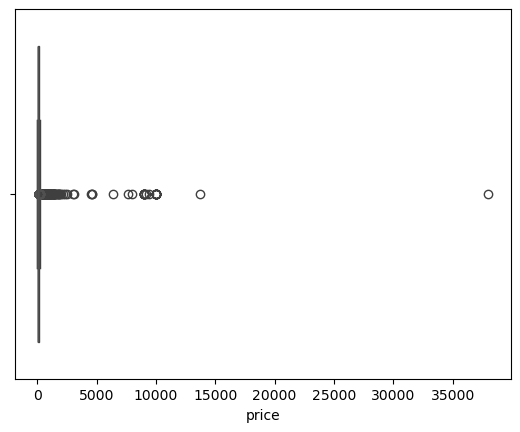

In [15]:
sns.boxplot(x=df['price'])  # full
sns.boxplot(x=df[~df.index.isin(df_outliers.index)]['price'])  # without outliers

In [16]:
df['is_price_outlier'] = df.index.isin(df_outliers.index)

In [17]:
df_clean = df[~df['is_price_outlier']]
df_outliers = df[df['is_price_outlier']]

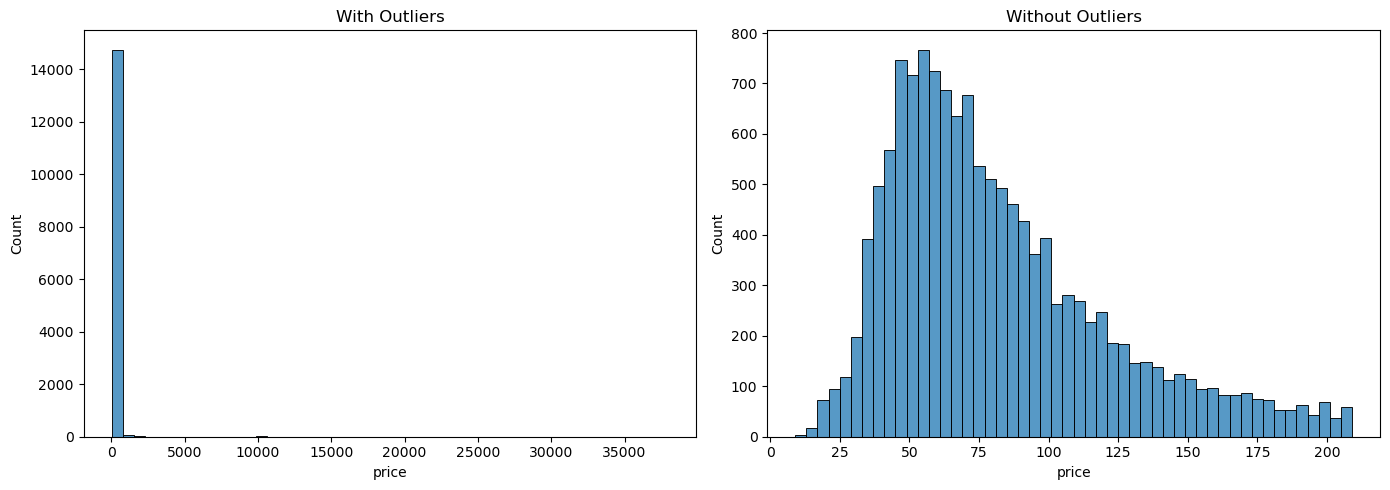

In [18]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], bins=50)
plt.title("With Outliers")

plt.subplot(1,2,2)
sns.histplot(df_clean['price'], bins=50)
plt.title("Without Outliers")

plt.tight_layout()
plt.show()


In [19]:
q1_r = df['reviews_per_month'].quantile(0.25)
q3_r = df['reviews_per_month'].quantile(0.75)

In [20]:
iqr_r = q3_r - q1_r

In [62]:
low_bound_r = max(0,q1_r - 1.5 * iqr_r)
up_bound_r = q3_r + 1.5 * iqr_r

In [64]:
low_bound_r

0

In [66]:
up_bound_r

5.744999999999999

In [68]:
df_reviews_outliers = df[df['reviews_per_month'] > up_bound_r]

In [70]:
len(df_reviews_outliers)

460

In [73]:
df['reviews_per_month'].sort_values(ascending=False).head(10)

14256    16.98
14346    16.00
13938    14.56
7415     12.73
12463    12.35
13527    12.00
11482    11.19
12812    10.86
13184    10.78
12083    10.51
Name: reviews_per_month, dtype: float64

In [75]:
df_reviews_outliers['room_type'].value_counts()

room_type
Entire home/apt    425
Private room        35
Name: count, dtype: int64

In [77]:
df_reviews_outliers['host_is_superhost'].value_counts()

host_is_superhost
True     313
False    147
Name: count, dtype: int64

In [81]:
df_reviews_outliers['availability_365'].describe()

count    460.000000
mean     233.278261
std      100.249062
min        0.000000
25%      168.000000
50%      260.500000
75%      314.000000
max      363.000000
Name: availability_365, dtype: float64

<Axes: xlabel='reviews_per_month'>

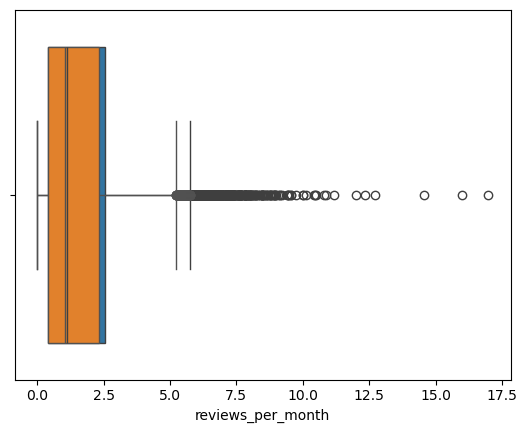

In [83]:
sns.boxplot(x=df['reviews_per_month'])  # full
sns.boxplot(x=df[~df.index.isin(df_reviews_outliers.index)]['reviews_per_month'])  # clean

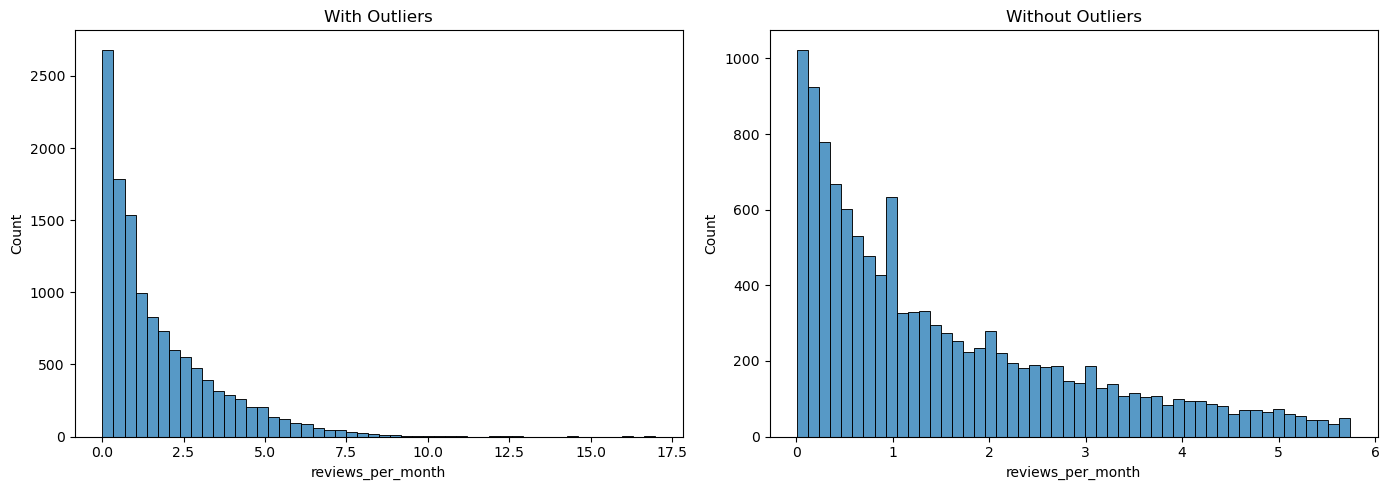

In [85]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df['reviews_per_month'], bins=50)
plt.title("With Outliers")

plt.subplot(1,2,2)
sns.histplot(df[~df['reviews_per_month'].isin(df_reviews_outliers['reviews_per_month'])]['reviews_per_month'], bins=50)
plt.title("Without Outliers")

plt.tight_layout()
plt.show()


In [116]:
price_mean = round(df['price'].mean() ,2)
price_mean_clean = round(df[~df.index.isin(df_outliers.index)]['price'].mean() ,2)

In [136]:
price_mean

131.18

In [138]:
price_mean_clean

81.37

In [140]:
reviews_mean = round(df['reviews_per_month'].mean() ,2)
reviews_mean_clean = round(df[~df.index.isin(df_outliers.index)]['reviews_per_month'].mean() ,2)

In [142]:
reviews_mean

1.74

In [144]:
reviews_mean_clean

1.75

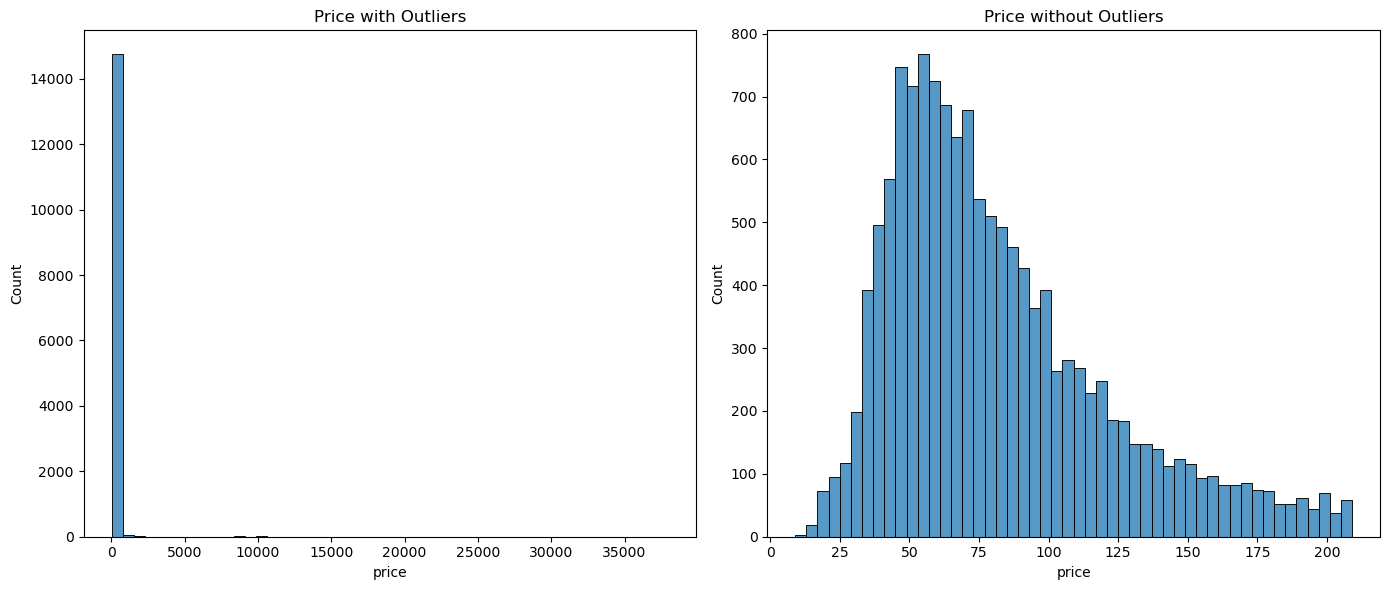

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['price'], bins=50, ax=axes[0])
axes[0].set_title('Price with Outliers')

sns.histplot(df[~df.index.isin(df_outliers.index)]['price'], bins=50, ax=axes[1])
axes[1].set_title('Price without Outliers')

plt.tight_layout()
plt.show()


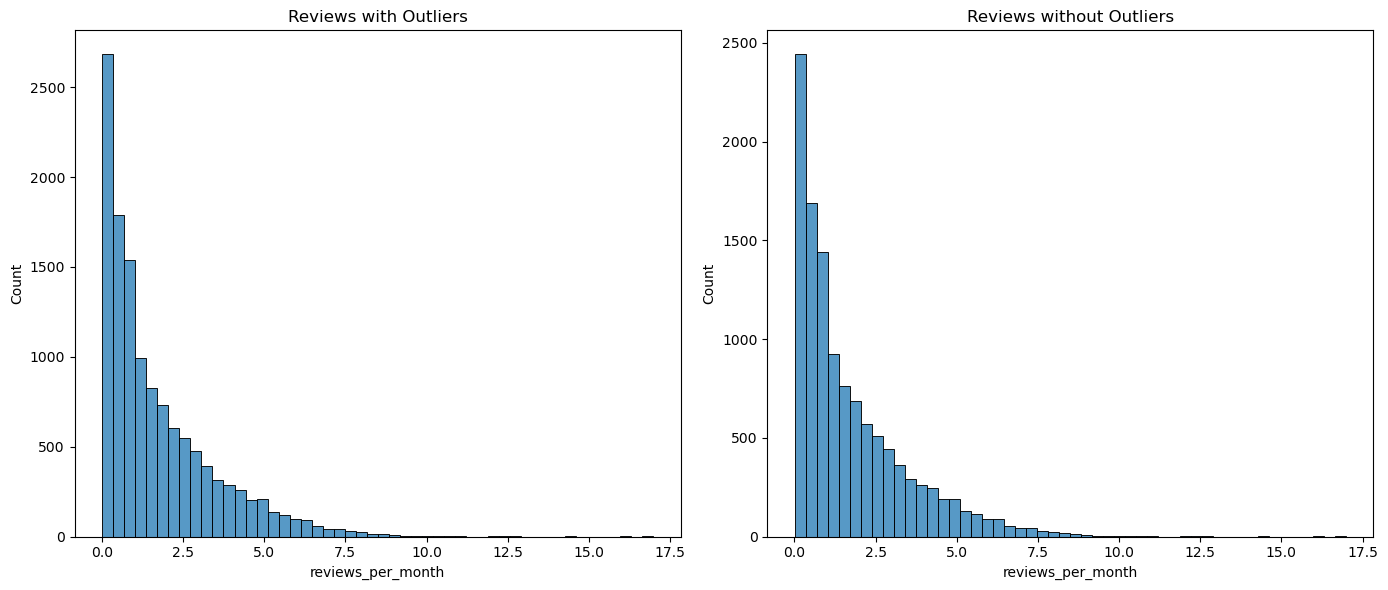

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['reviews_per_month'], bins=50, ax=axes[0])
axes[0].set_title('Reviews with Outliers')

sns.histplot(df[~df.index.isin(df_outliers.index)]['reviews_per_month'], bins=50, ax=axes[1])
axes[1].set_title('Reviews without Outliers')

plt.tight_layout()
plt.show()